In [140]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from datetime import time
import datetime


#  Leyendo los archivos de cada mes

In [2]:
files = [file for file in os.listdir('./CSVmeses')]
luigi = {}
for file in files:
    luigi[file] =  pd.read_csv('./CSVmeses/'+ file)

# Solo tomar la parte de radiación de los meses

In [3]:
for peach in luigi:
    luigi[peach] = luigi[peach][['TOA5','CR1000X']]

# Transformando las fechas de objetos a datetime

In [4]:
for wario in luigi:
    luigi[wario]['TOA5'] = pd.to_datetime(luigi[wario]['TOA5'])

# Convirtiendo la tabla

función que tiene de input un dataframe y lo saca con horas en renglones y días en columnas

In [5]:
def graph_month(df):
    df = df.copy()
    #se especifica como se quiere el output de la fecha
    df.index = pd.to_datetime(df['TOA5'], format="%Y-%m-%d %H:%M:%S")
    df = df.drop('TOA5', axis=1)
    days = np.unique(df.index.date)
    #crea nuevo dataframe con el formato que se quiere
    df_new = pd.DataFrame(columns=["TOA5"] + list(map(lambda x: f"DAY {x}", range(1, len(days)+1))))
    df_new["TOA5"] = df.index.time
    #aniadir el nombre a cada columna y ordenar los valores del DF
    for day_num, day in enumerate(days):
        df_day = df[df.index.date == day].reset_index(drop=True)
        df_new[f"DAY {day_num + 1}"] = df_day["CR1000X"]
    return df_new


# Creando los archivos de cada mes y exportandolos

In [6]:
#for waluigi in luigi:
    #graph_month(luigi[waluigi]).to_csv(str(waluigi) + '_output.csv')
    

# Renombramos el diccionario con todos los archivos por los nuevos archivos generados previamente

In [7]:
files = [file for file in os.listdir('./RAD_mes_por_dia')]
luigi = {}
for file in files:
    luigi[file] =  pd.read_csv('./RAD_mes_por_dia/'+ file)

# Borramos todos los renglones vacíos y sacamos el promedio de la radiación de cada minuto del día

Comentado porque genera los archivos

In [8]:
for toad in luigi:
    luigi[toad].drop(luigi[toad].index[1440:], inplace=True, axis=0)
    luigi[toad]['Radiación Promedio'] = luigi[toad].iloc[:, 3:].mean(axis=1)
    #luigi[toad].to_csv('final ' + str(toad))


# Gráfica de todos los meses juntos

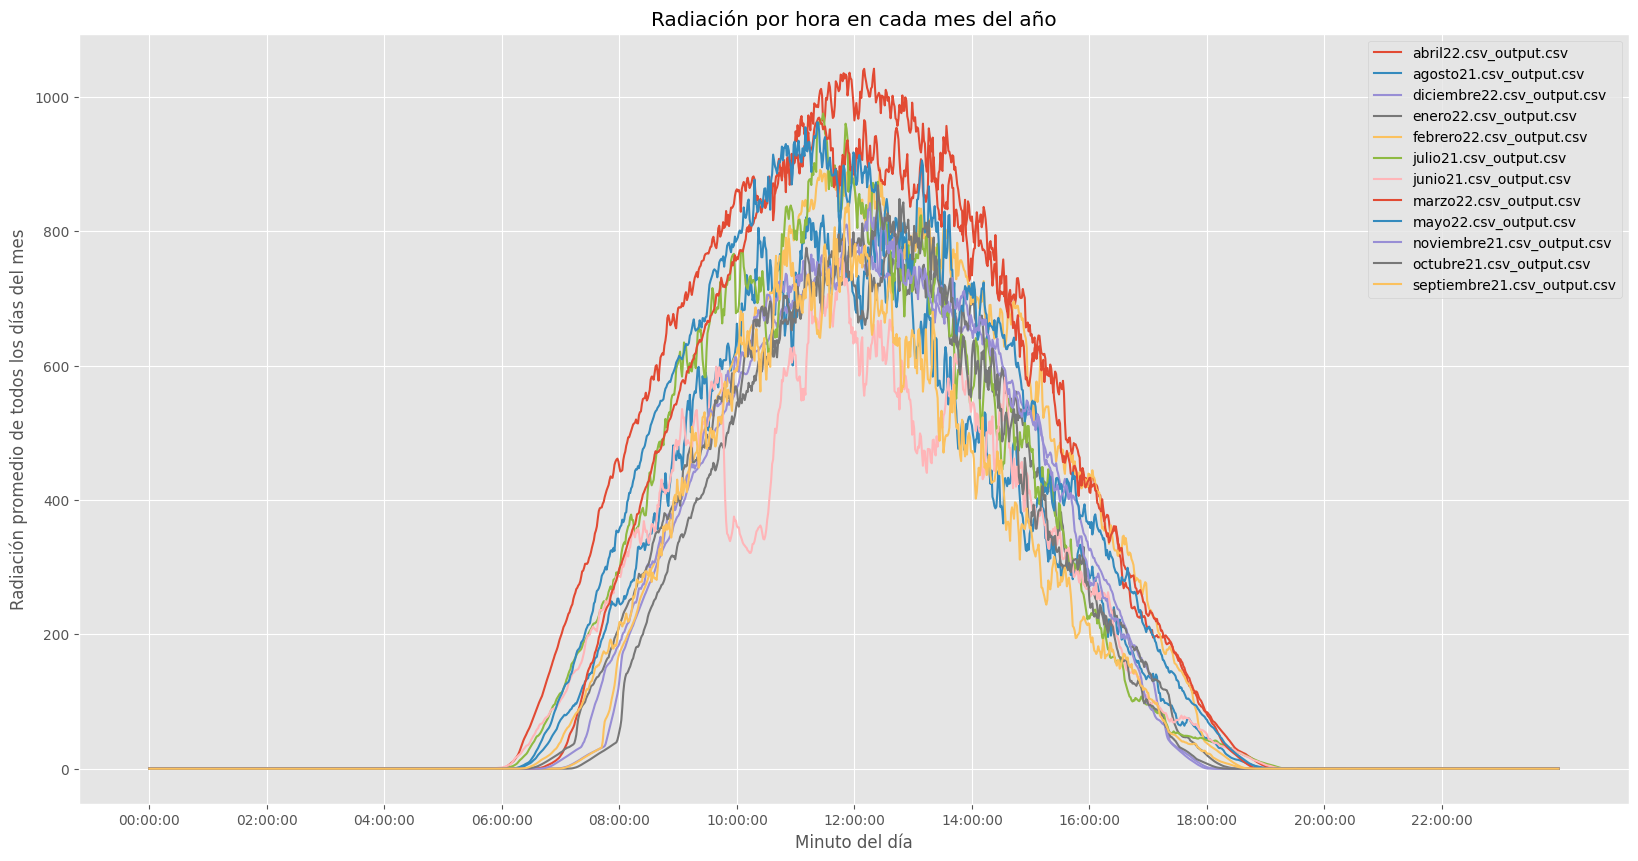

In [9]:
plt.style.use('ggplot')
plt.figure(figsize= (20,10))
plt.title('Radiación por hora en cada mes del año')
plt.xlabel('Minuto del día')
plt.ylabel('Radiación promedio de todos los días del mes')

for bowser in luigi:
    plt.plot(luigi[bowser].TOA5, luigi[bowser]['Radiación Promedio'], label = bowser )
    
plt.xticks(luigi['abril22.csv_output.csv']['Unnamed: 0'][::120])
plt.legend()

# Radiación por cada mes por separado

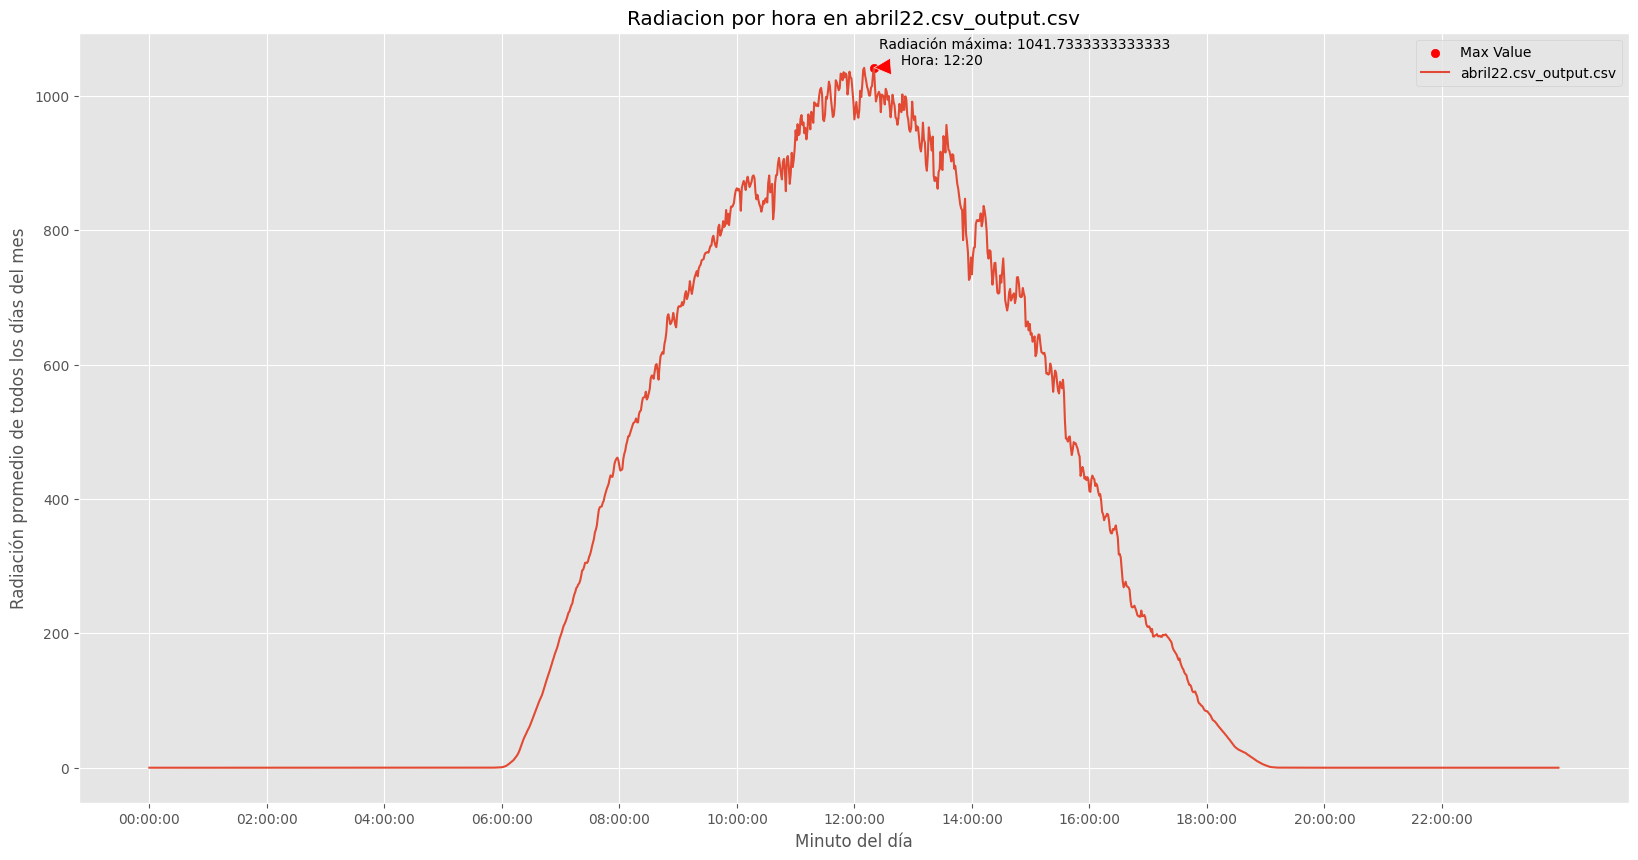

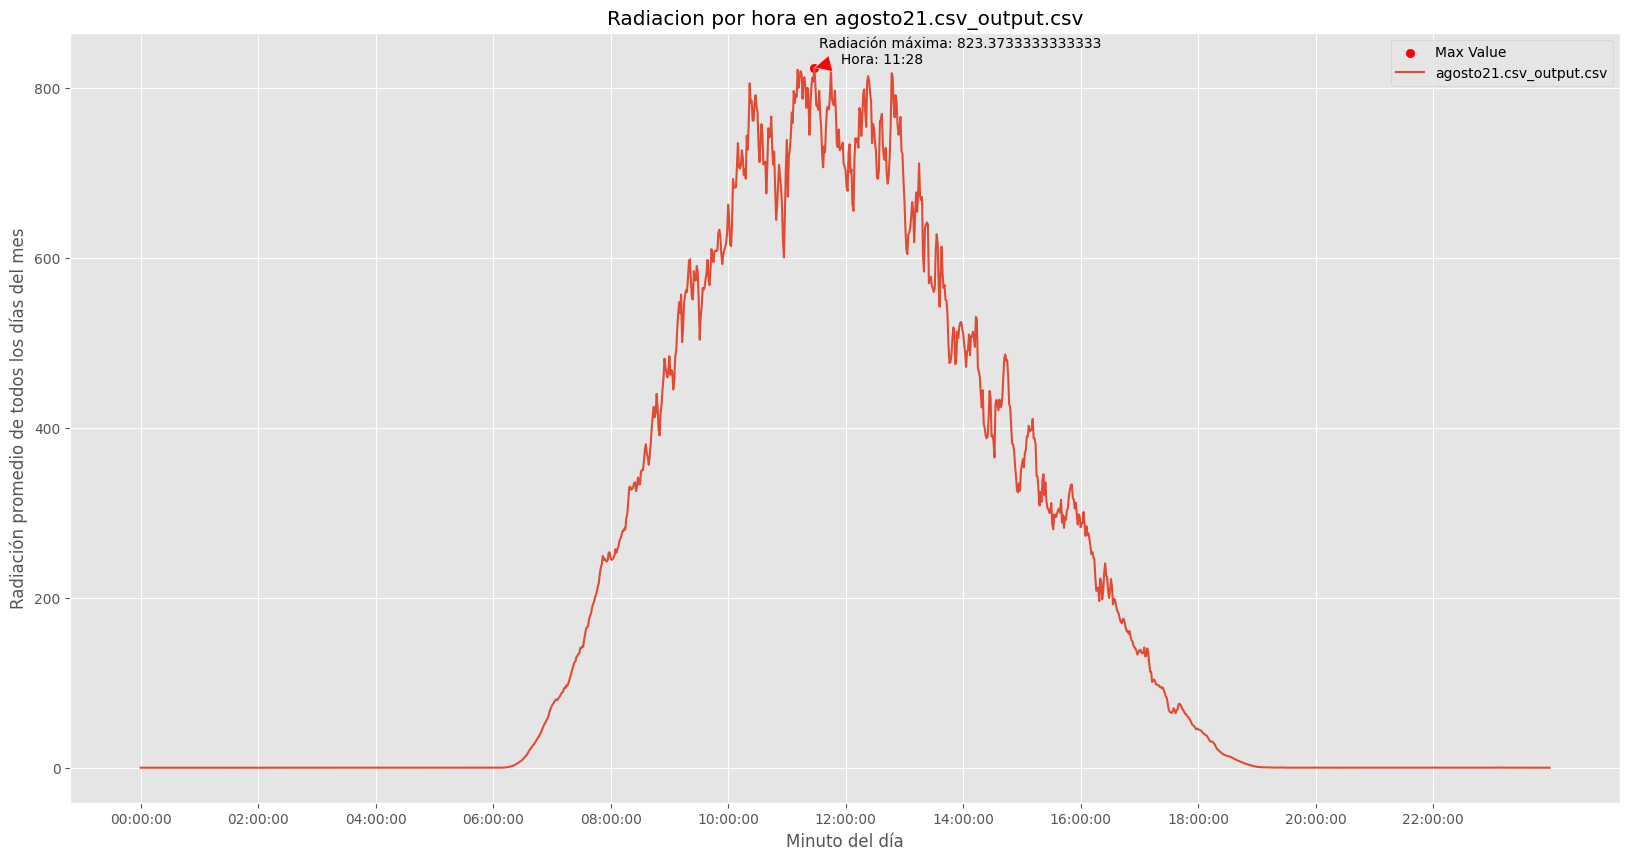

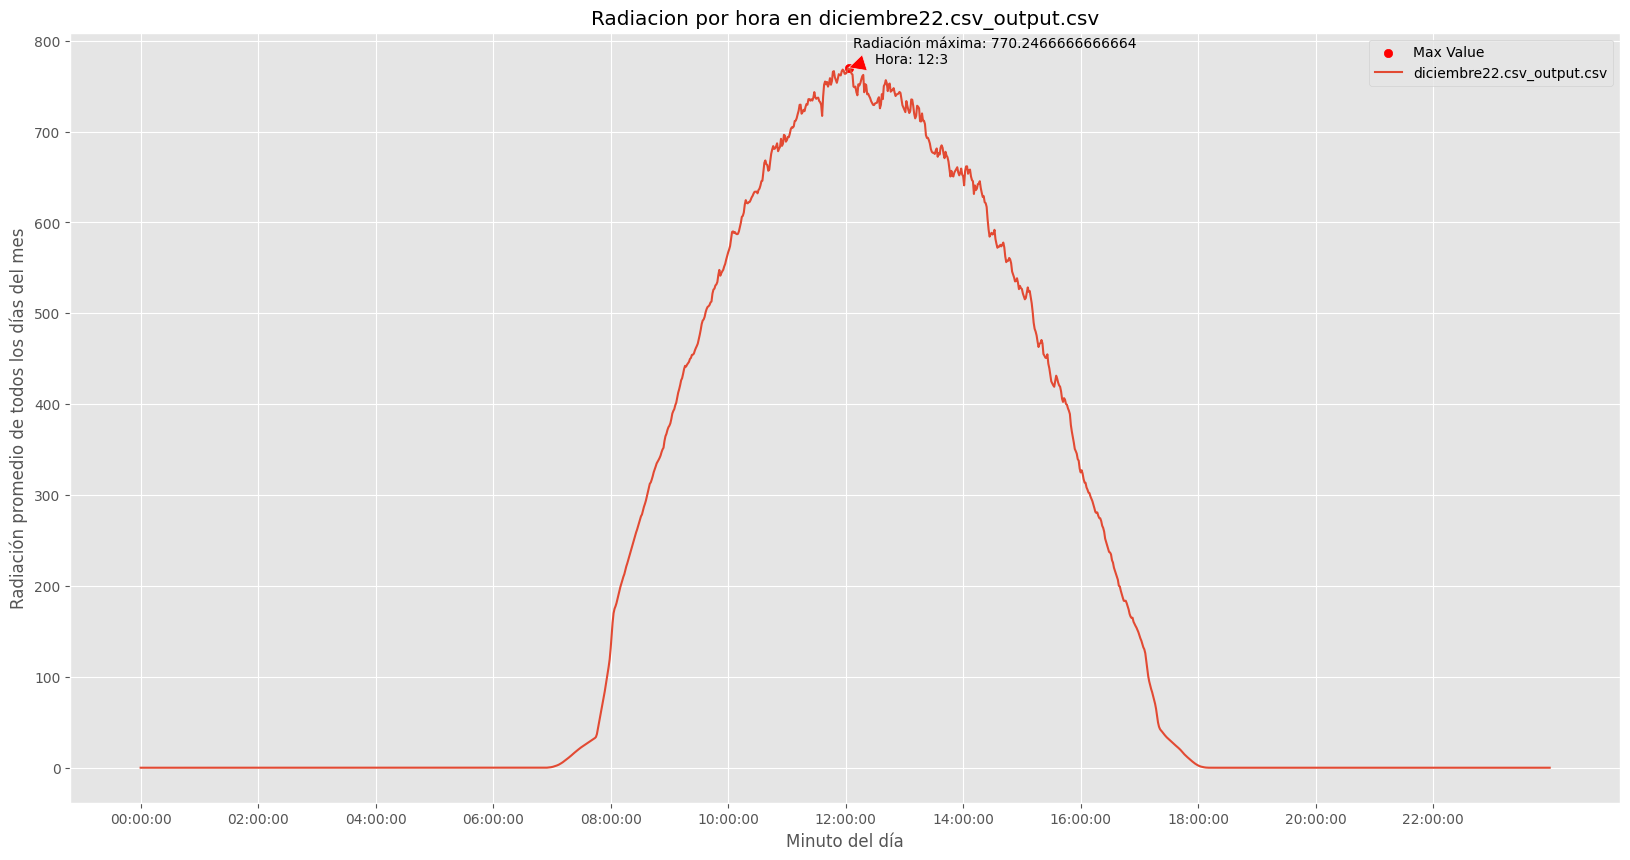

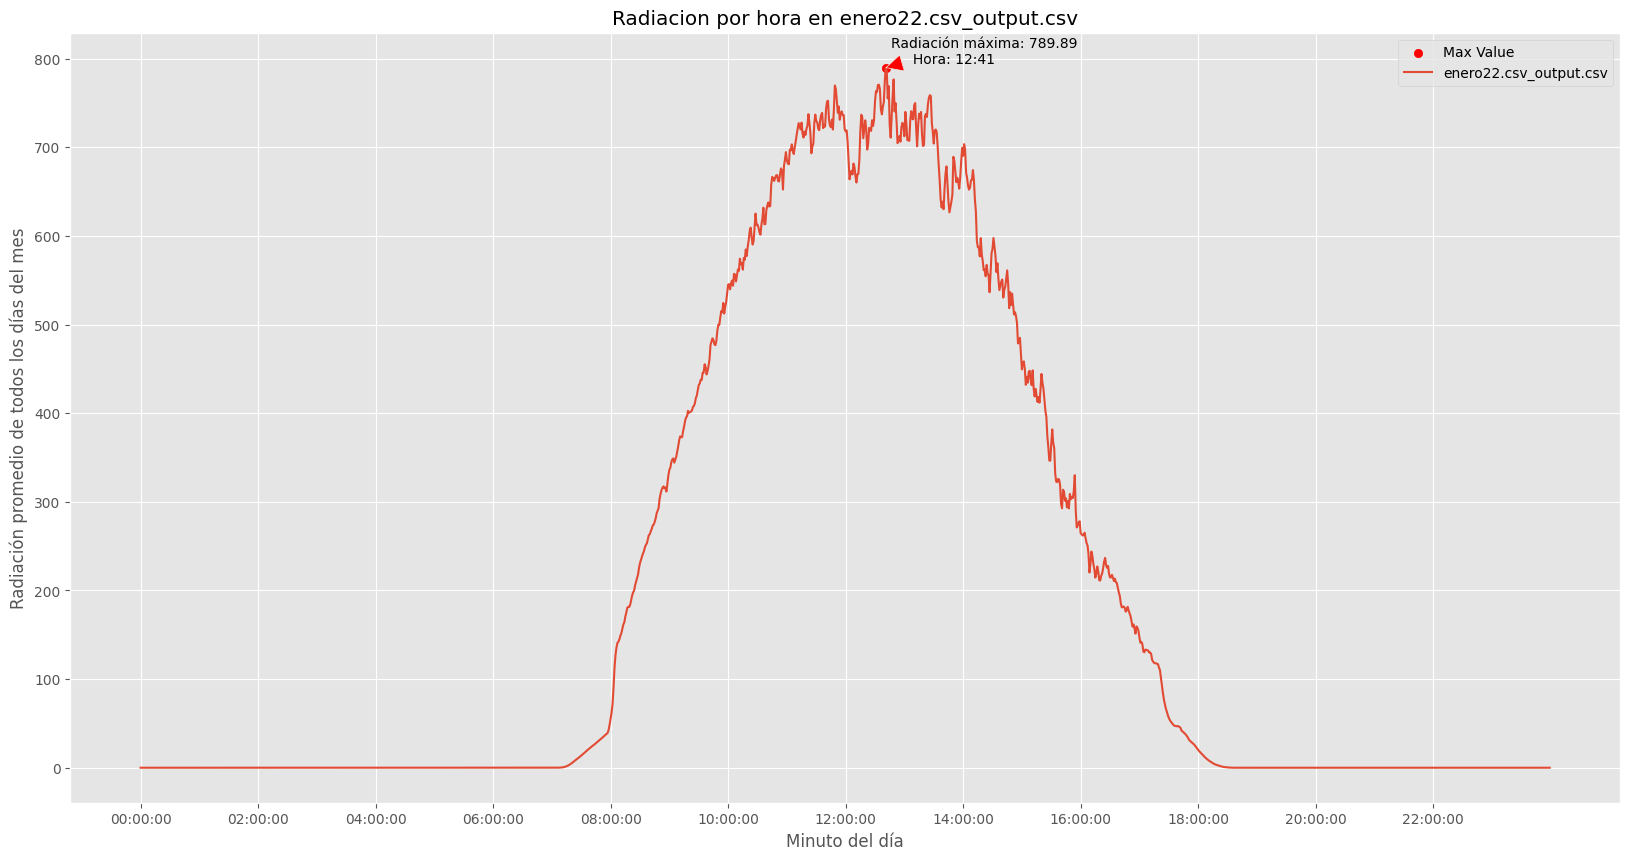

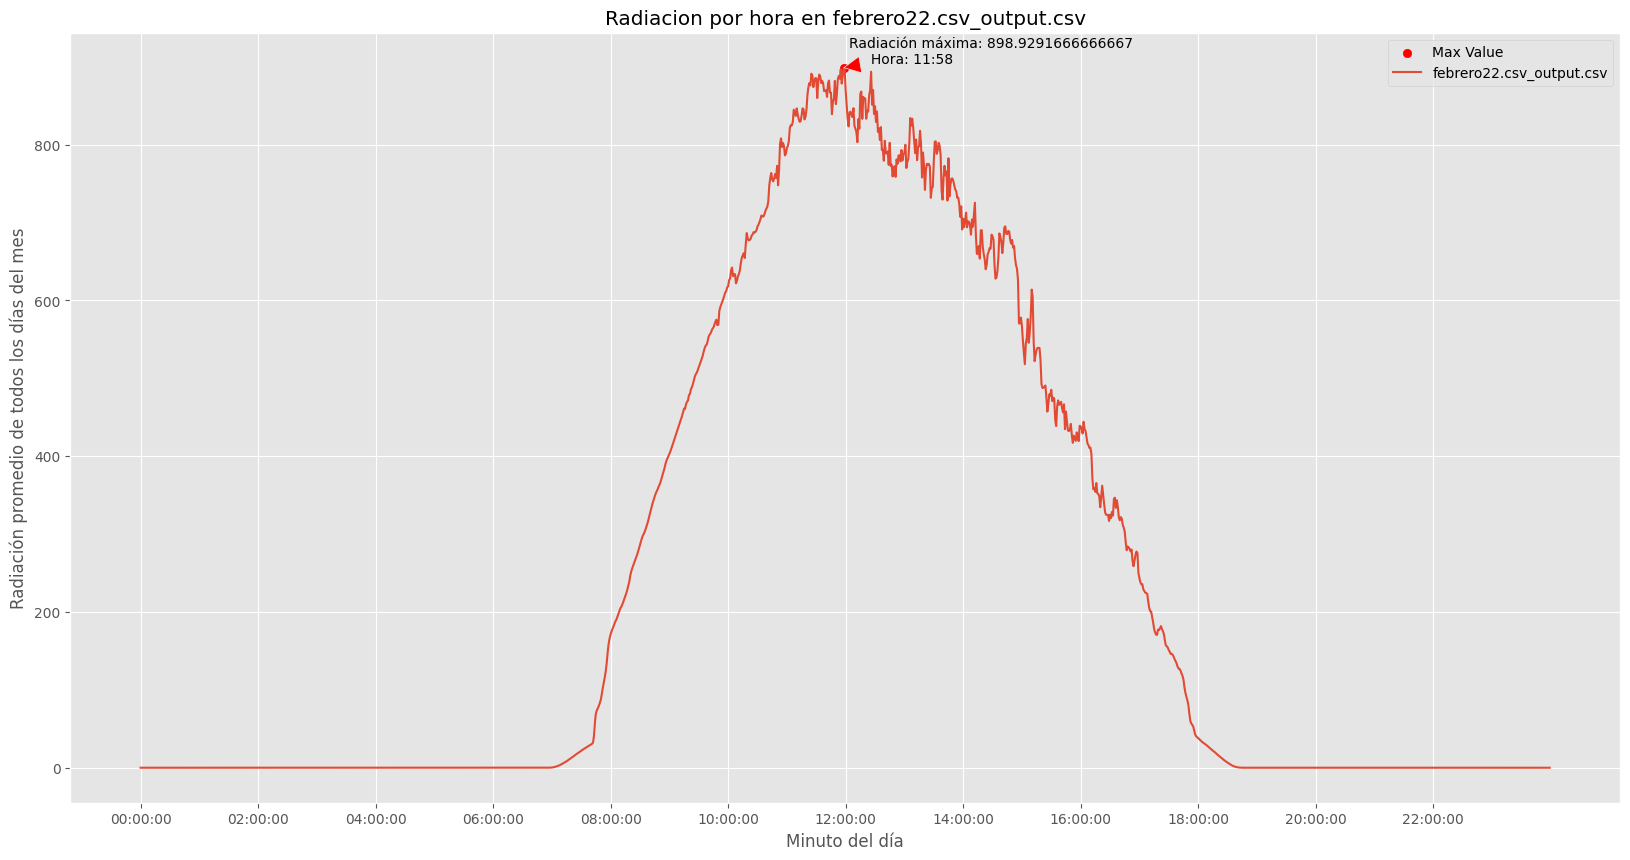

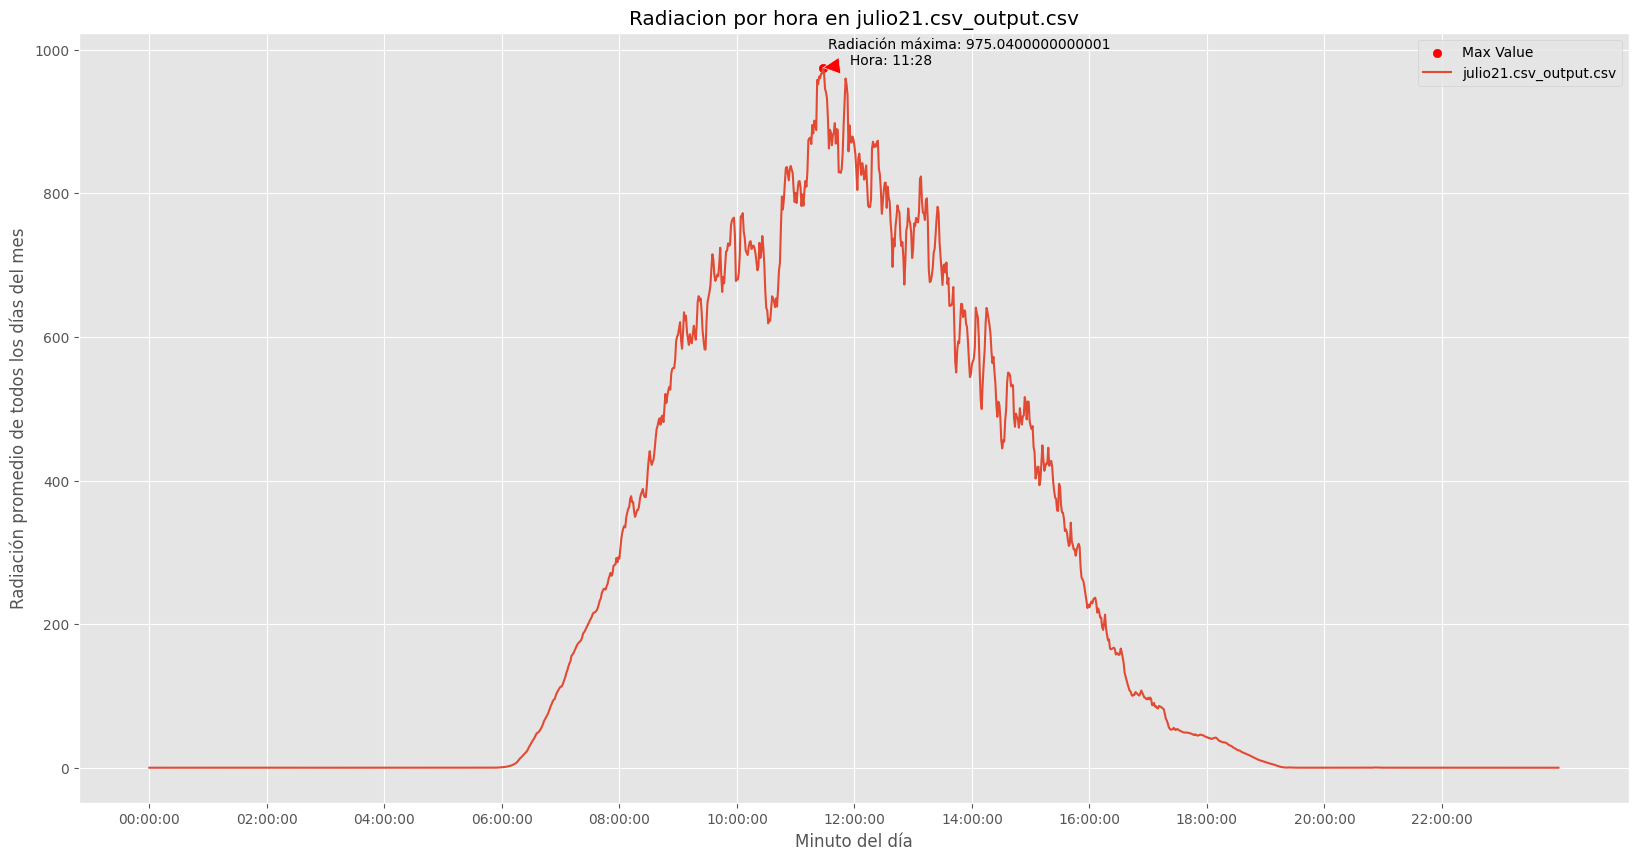

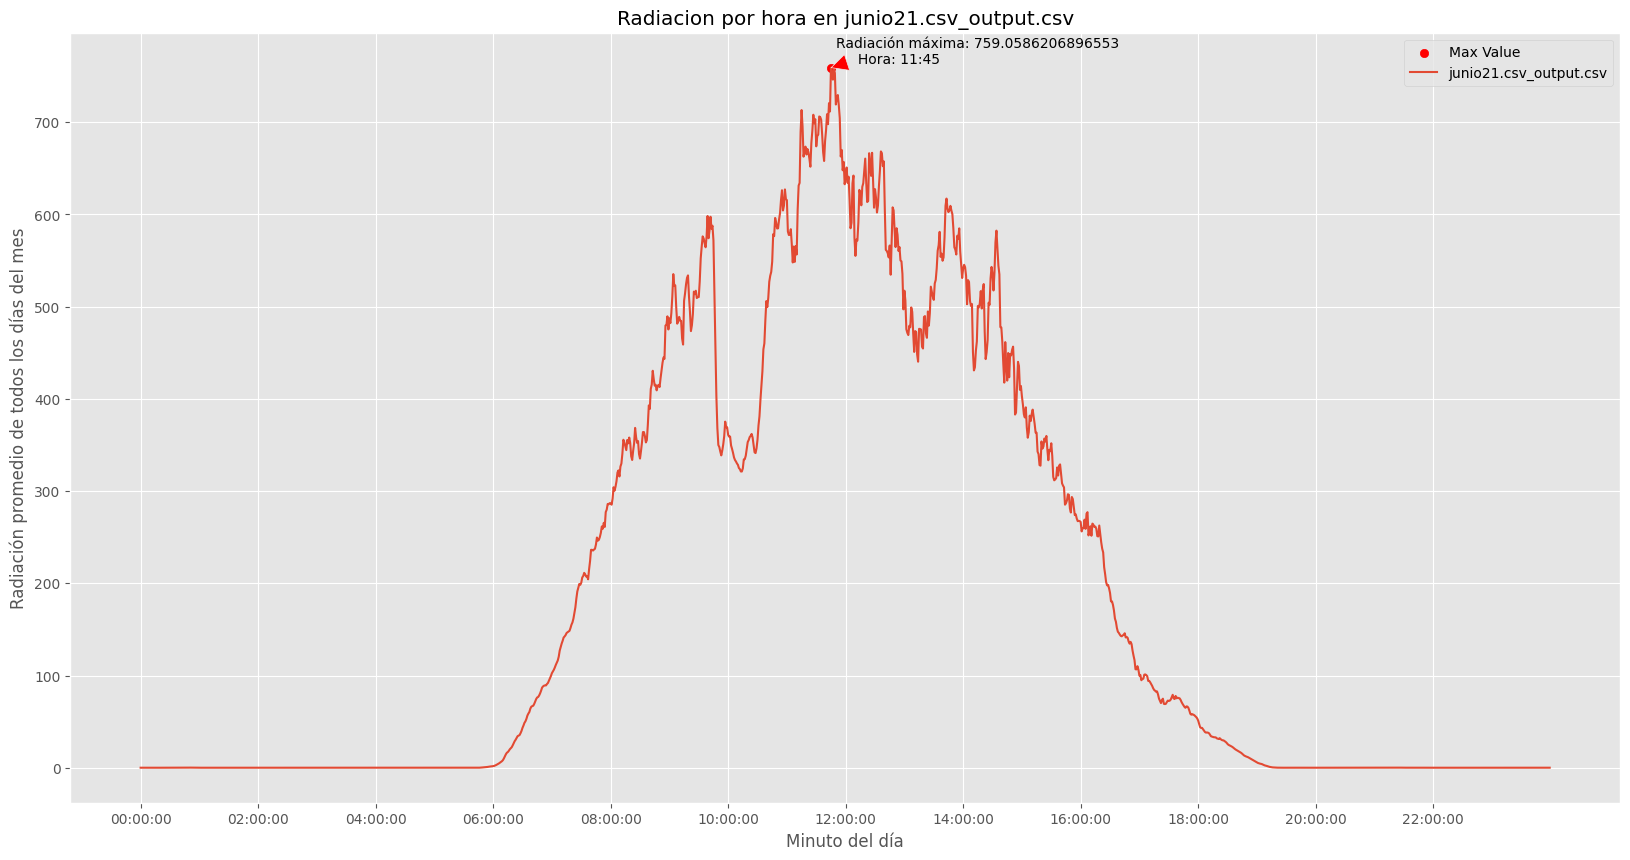

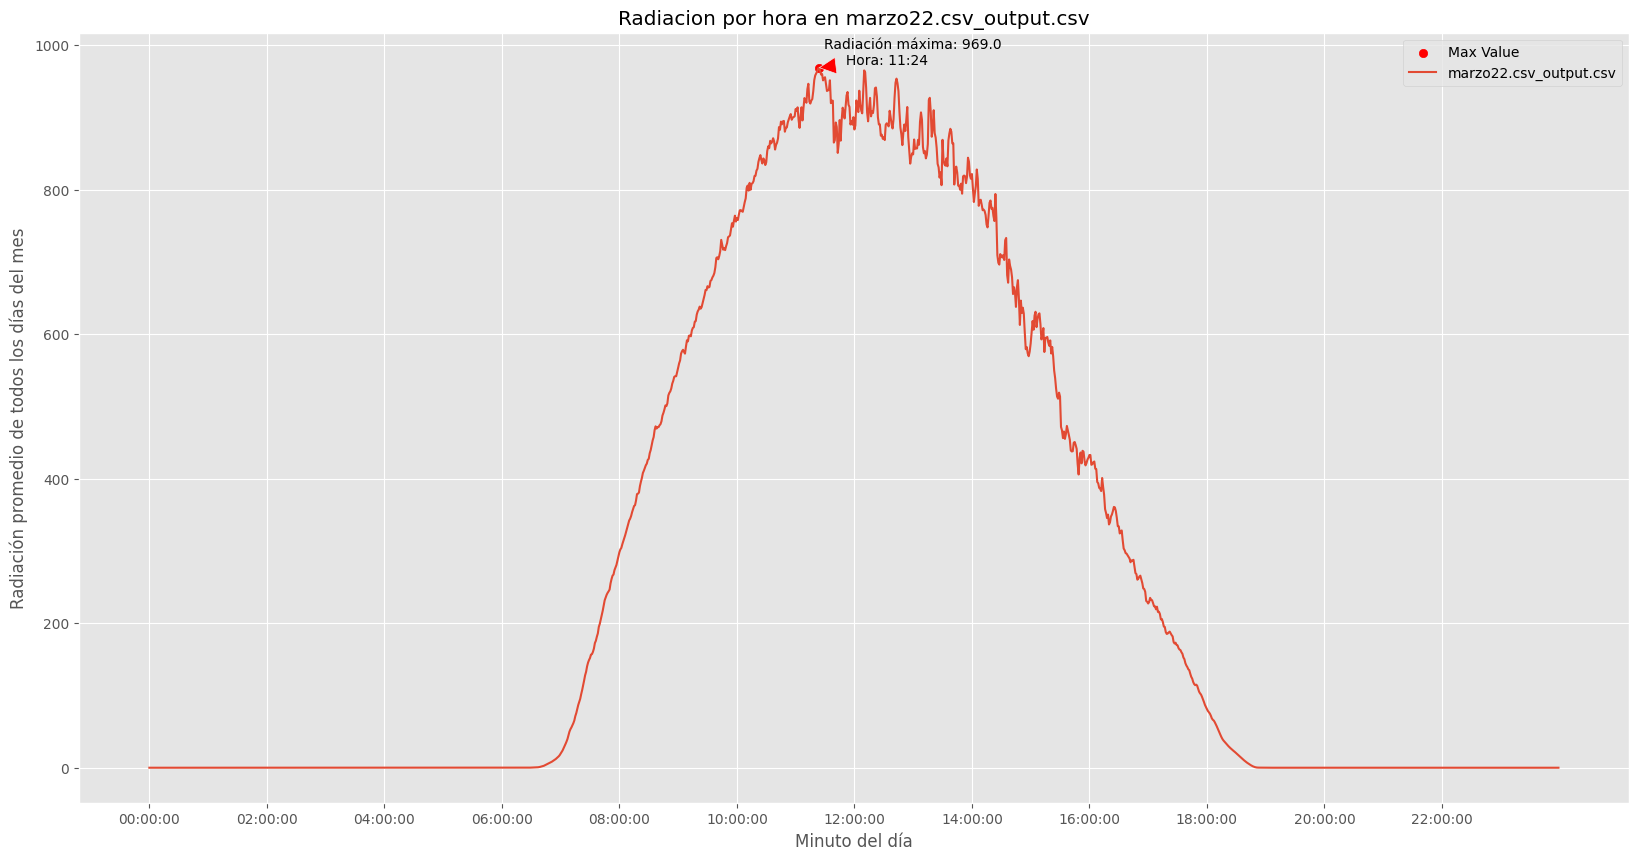

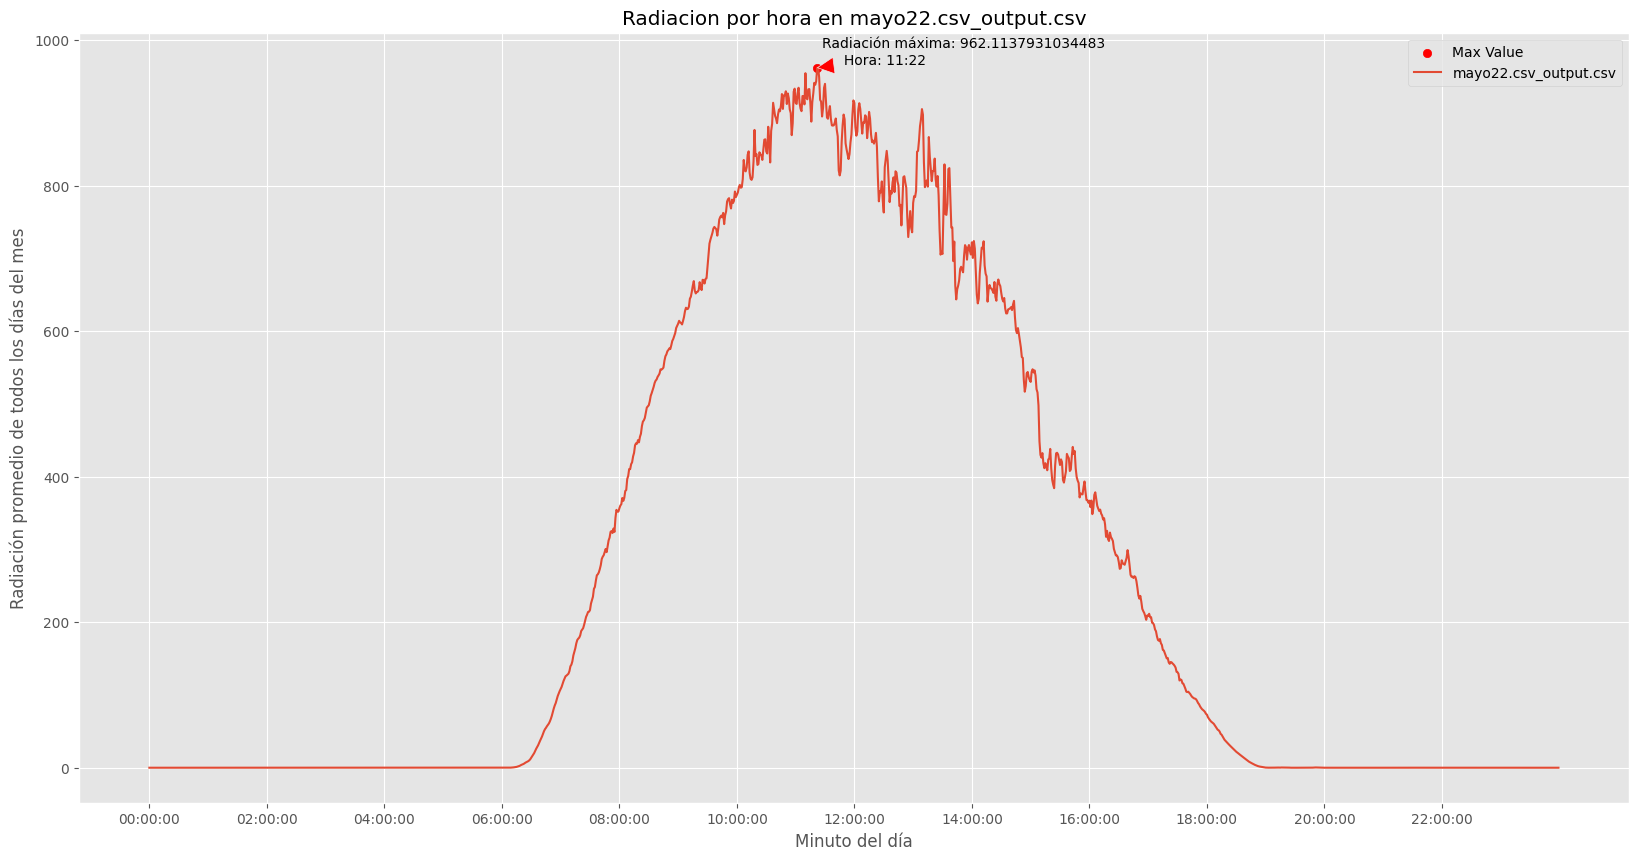

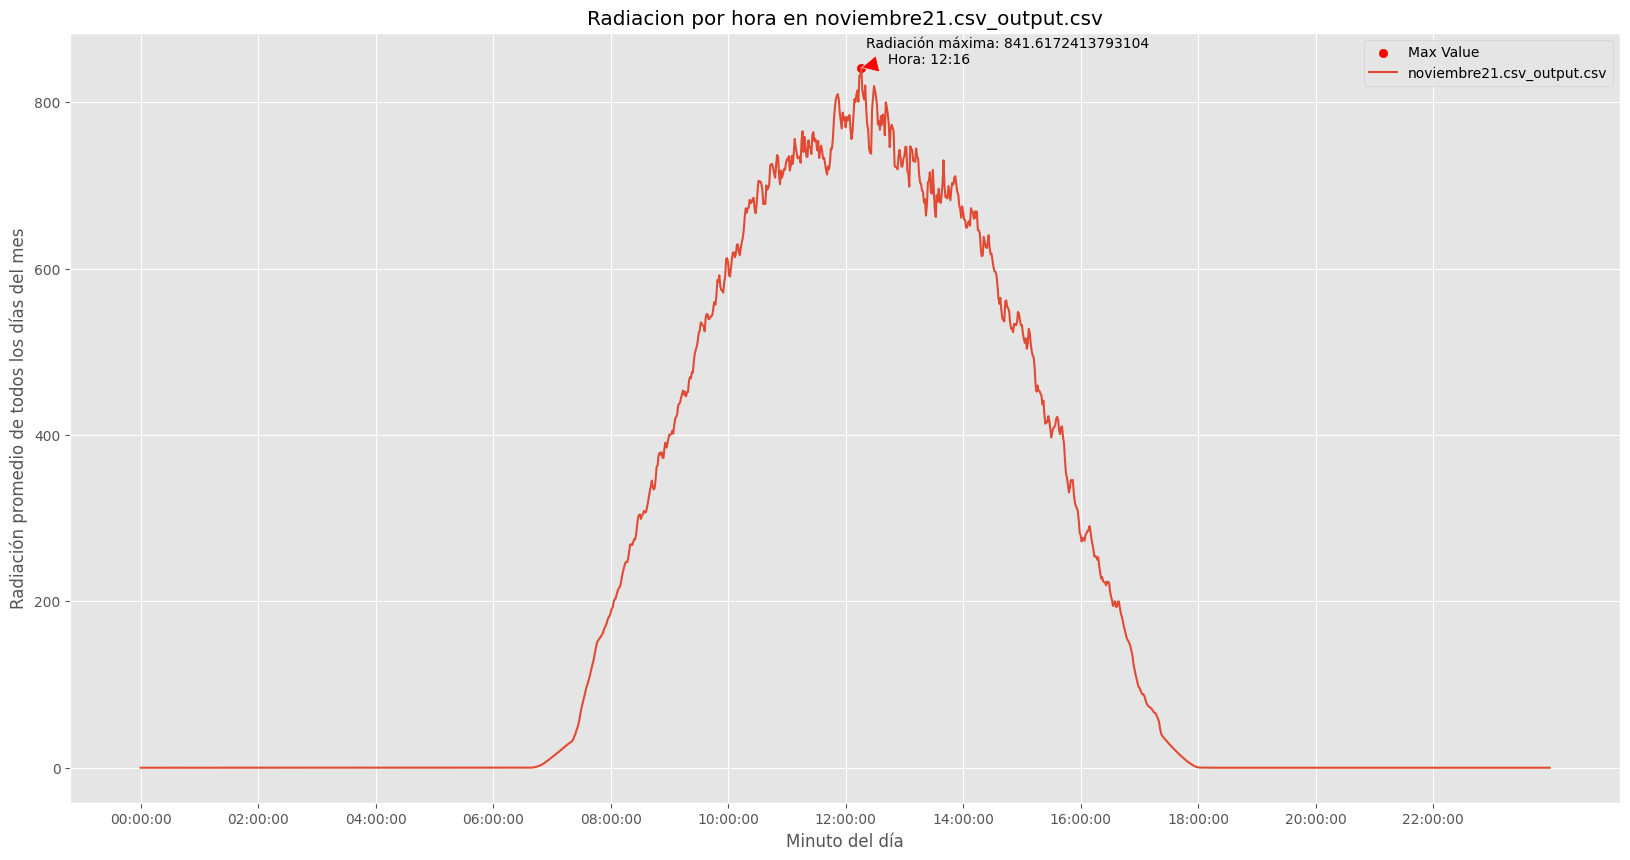

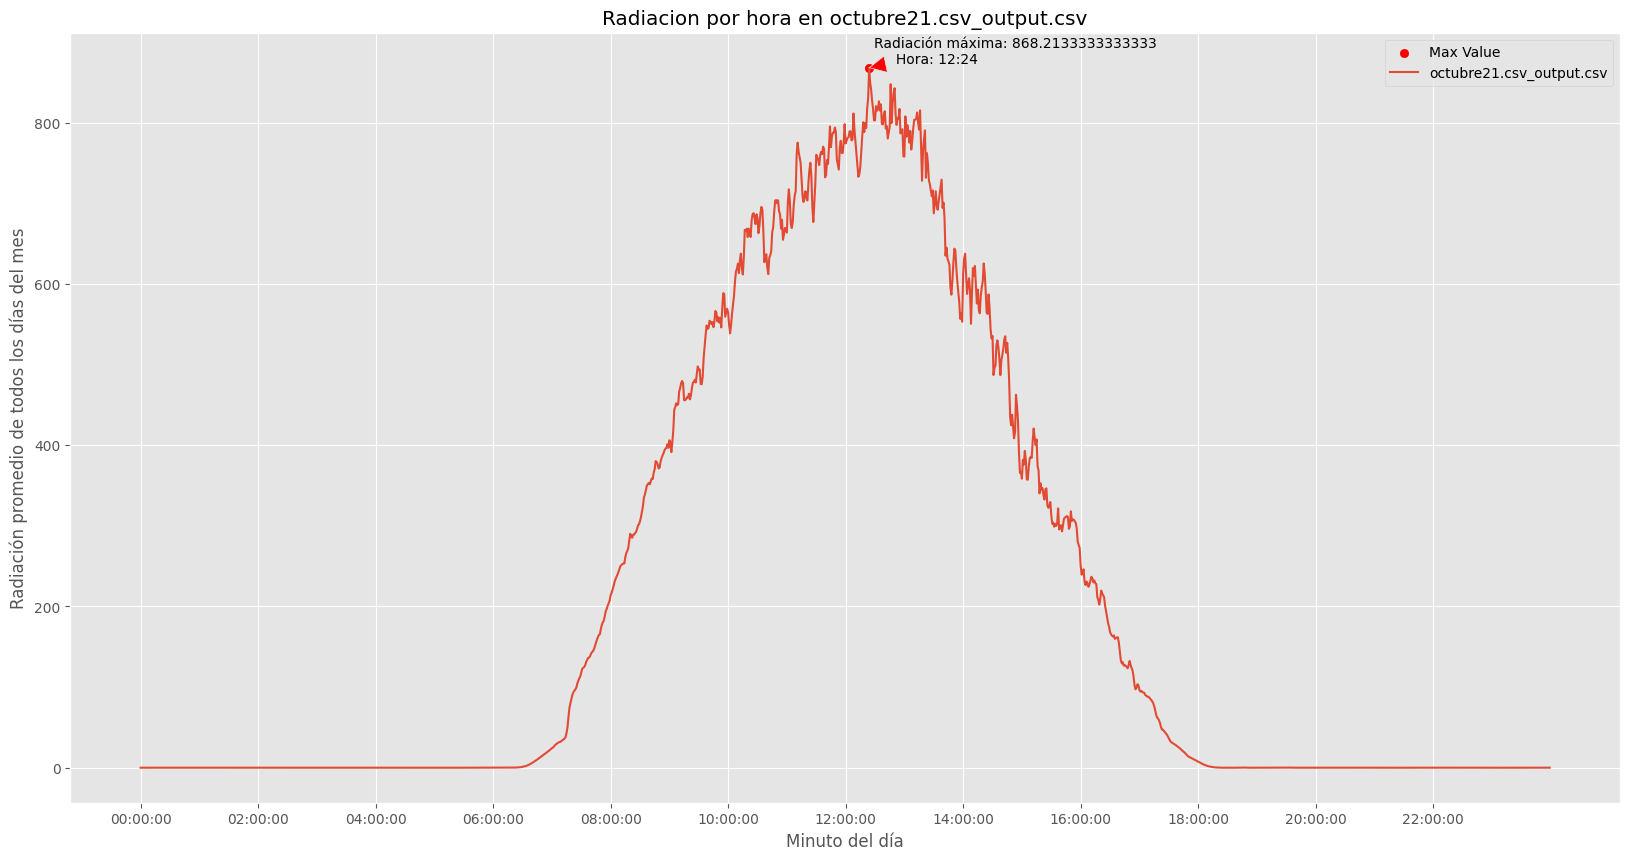

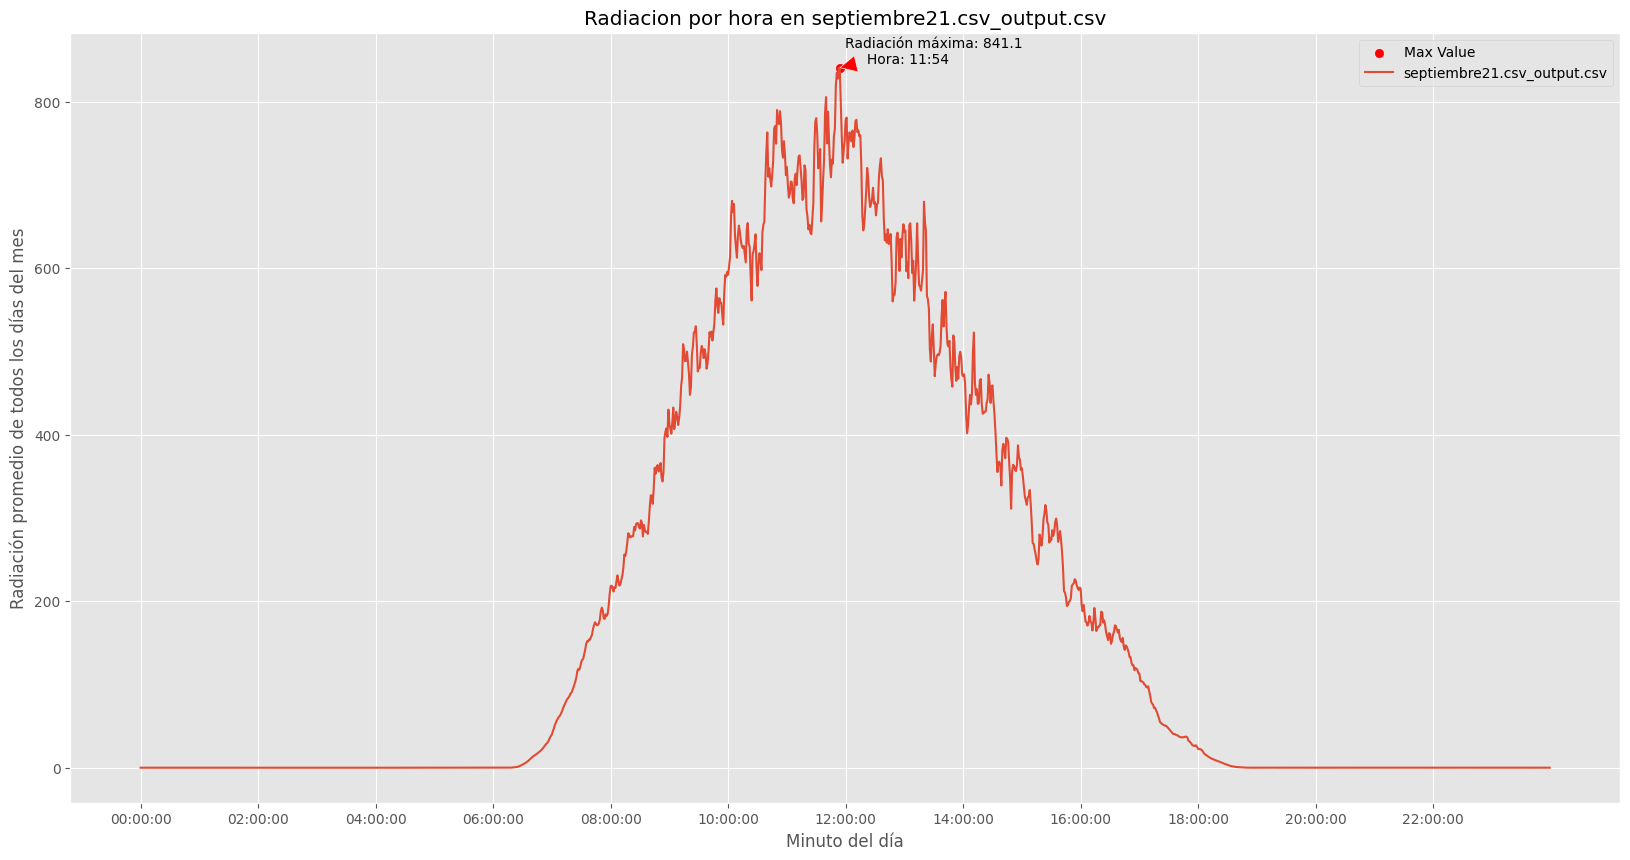

In [10]:

for bowser in luigi:
    plt.style.use('ggplot')
    plt.figure(figsize= (20,10))
    plt.title('Radiacion por hora en ' + str(bowser))
    plt.xlabel('Minuto del día')
    plt.ylabel('Radiación promedio de todos los días del mes')
    max_value = luigi[bowser]['Radiación Promedio'].max()
    max_index = luigi[bowser]['Radiación Promedio'].idxmax()
    plt.scatter(x=max_index, y=max_value, color='r', label='Max Value')
    plt.annotate('Radiación máxima: '+str(max_value)+'\n     Hora: '+ str(max_index//60)+':'+ str(max_index % 60), xy=(max_index, max_value), xytext=(max_index+5, max_value+5),arrowprops=dict(facecolor='red', shrink=0.05))
    plt.plot(luigi[bowser].TOA5, luigi[bowser]['Radiación Promedio'], label = bowser )
    plt.xticks(luigi['abril22.csv_output.csv'].TOA5[::120])
    plt.legend()




In [127]:
for index,row in luigi['junio21.csv_output.csv'].iterrows():
    if index > 480 and index < 840 and row[2] < 200:
        print(index,row[2])


In [161]:
am = time(10,10,00)
for index,row in luigi['junio21.csv_output.csv'].iterrows():
    row[1] = time(int(row[1]))

ValueError: invalid literal for int() with base 10: '00:00:00'

In [172]:
for row in luigi['junio21.csv_output.csv'].iterrows():
    type(luigi['junio21.csv_output.csv']['TOA5'])

In [174]:
type(luigi['junio21.csv_output.csv']['TOA5'][2])

str